# Linear Regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Fomula

$$ \hat{y} = w_{1}.w_{1} + ... + w_{n}.x_{n} + bias $$

$$ \leftrightharpoons  \hat{y} = Xw + b $$



In [2]:
def LR(w, X):
    return X.dot(w)

**Loss Function: (MSE)**

$$ Mean Square Error = \frac{1}{2}(y - \hat{y})^{2} $$

$$ L(w) = \frac{1}{2N}\left \|(y - X^{T}.w)\right \|_{2}^{2} $$

$$ \bigtriangledown_{w} L(w) = \frac{1}{N}X(X^{T}w - y) $$

In [3]:
def loss(w, X, y):
    N = X.shape[0]
    return .5/N * np.linalg.norm(y - LR(w, X))**2

def grad(w, X, y):
    N = X.shape[0]
    return 1/N * X.T.dot(LR(w, X) - y)

**Optimizer: Gradient Descent**


$$ \theta \leftarrow \theta - \eta.\bigtriangledown_{\theta}f(\theta) $$

In [18]:
def Batch_GD(w_init, X, y, lr):
    w = w_init
    loss_hist = [loss(w, X, y)]
    for it in range(100):
        w_new = w - lr*grad(w, X, y)
        if np.linalg.norm(grad(w_new, X, y))/len(w_new) < 1e-3:
            break
        w = w_new
        loss_hist.append(loss(w, X, y))
    return w, loss_hist

## 2. Data

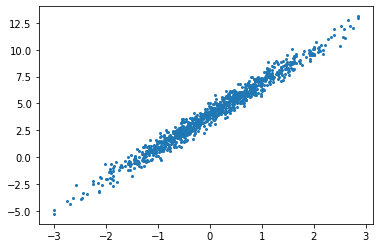

In [19]:
X = np.random.randn(1000)
y = 4 + 3 * X + .5*np.random.randn(1000)

plt.scatter(X, y, s=4)
plt.show()

In [20]:
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X.reshape(-1, 1)), axis = 1)

w_init = np.random.rand(Xbar.shape[1])
w_init.shape
lr = 0.1
w1, loss_hist = Batch_GD(w_init, Xbar, y, lr)
w1

array([3.97488348, 3.0055093 ])

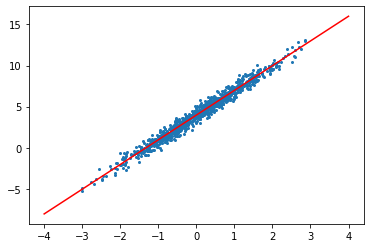

In [21]:
plt.scatter(X, y, s=4)
X0 = np.linspace(-4, 4, 20)
y0 = w1[0] + w1[1]*X0
plt.plot(X0, y0, 'r')
plt.show()

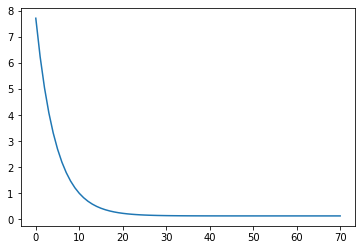

In [23]:
plt.plot(loss_hist)
plt.show()